<a href="https://colab.research.google.com/github/sonnnaya/GaussianNaiveBayesClassifier/blob/main/GaussianNaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes Classifier
## Classification introduction
The classification problem has the following wording:
* Given a certain set of objects divided into predefined classes - such set is called a training sample.
* There are many objects whose membership in certain classes is unknown.

It is necessary to define a classification rule, according to which we will be able to classify indeterminate images into classes formed by the training sample.

*Check out [Classification by using decisive functions and diving hypersurfaces](https://github.com/sonnnaya/DecisiveAndDividingFunctions/blob/main/DecisiveAndDividingFunctions.ipynb) for more info about such rules of classification.*

---


Let be given classes: 
$$
w_{1},w_{2},...,w_{M}
$$ 
each of which contains $N_{i}\ (i=\overline{1,M})$ number of images respectively: 
$$
\{\overline{x}_{1}, \overline{x}_{2},...,\overline{x}_{N_{i}}\},
$$
where image is a n-dimensional vector of its attributes:
$$
\overline{x}=[x_{1},x_{2},...,x_{n}]^{T}
$$


In [1]:
import numpy as np
from typing import List


class Cluster:
    def __init__(self, images: List[np.ndarray]):
        self.images: List[np.ndarray] = images

    def add(self, image: np.ndarray) -> None:
        self.images.append(np.array(image))


## Bayes Classifier
The Bayesian classification is based on the maximum probability hypothesis:

An image $\overline{x}$ belongs to the class $w_{i}$ if the probability that this image belongs to the class $P(w_{i}|\overline{x})$ is the greatest among all probabilities $P(w_{1}|\overline{x}),P(w_{2}|\overline{x}),...,P(w_{M}|\overline{x})$.

That is, we need to find the largest posterior probability:
$$
max(P(w_{1}|\overline{x}),P(w_{2}|\overline{x}),...,P(w_{M}|\overline{x}))
$$
Using the Bayesian theorem, we can rewrite the expression as:
$$
P(w_{i}|\overline{x}) = \frac{P(w_{i})P(\overline{x}|w_{i})}{P(\overline{x})},
$$
where:

$P(w_{i}|\overline{x})\ -$ the probability that $\overline{x}$ belongs to class $w_{i}$ (posterior probability)

$P(w_{i})\ -$ the probability of getting into class $w_{i}$ (prior probability)

$P(\overline{x}|w_{i})\ -$ the probability of appearance of image $\overline{x}$ in class $w_{i}$ (likelihood function)

$P(\overline{x})\ -$ total probability of appearance of the $\overline{x}$ image


> Note that all subsequent equations of a posteriori probability are such exclusively in the context of classification problem and in the context of decision functions determination.


We can simplify this formula as a classification rule, since the probability $P(\overline{x})=const$ $\forall\ w_{i},\ i=\overline{1,M}$:
$$
P(w_{i}|\overline{x}) = P(w_{i})P(\overline{x}|w_{i}),
$$
Include the fact that each image $\overline{x}$ is represented by vector of attributes $\overline{x}=[x_{1},x_{2},...,x_{n}]^{T}$:
$$
P(w_{i}|x_{1},x_{2},...,x_{n}) = P(w_{i})P(x_{1},x_{2},...,x_{n}|w_{i}),
$$

### Naive assumption
If we make a naive assumption that all features $x_{1},x_{2},...,x_{n}$ are independent of each other, then the equation of the desired probability will take the form:
$$
P(w_{i}|x_{1},x_{2},...,x_{n})=P(w_{i})P(x_{1}|w_{i}),P(x_{2}w_{i}),...,P(x_{n}|w_{i})=
$$
$$
=P(w_{i}){\displaystyle \prod_{n} P(x_{n} | w_{i})}
$$
Such an assumption is rather naive, since in most cases the features of the image will influence each other, but this approach significantly simplifies the calculation model and in many cases gives fairly accurate results.

In [2]:
from functools import reduce
from scipy.stats import norm


def likelihood_function(x: np.ndarray, mean: np.ndarray, std: np.ndarray) -> float:
    return reduce(lambda i, j: i * j, norm.pdf(x, mean, std))


def prior_probability(total_images: int, cluster: Cluster) -> float:
    return len(cluster.images) / total_images


def posterior_probability(x: np.ndarray, clusters: List[Cluster], cluster: Cluster) -> float:
    total_images = sum(map(lambda x: len(x.images), clusters))

    mean = np.array(cluster.images).mean(axis=0)
    std = np.array(cluster.images).std(axis=0)

    return likelihood_function(x, mean, std) * prior_probability(total_images, cluster)


### Arithmetic underflow
In practice, multiplying sufficiently small probabilities gives an even smaller number that can be perceived by a computer as 0. This problem is also known as arithmetic underflow. Such situations can affect the classification result.

To exclude such cases, we need to use the logarithmic function:
$$
P(w_{i}|x_{1},x_{2},...,x_{n})=ln(P(w_{i})\prod\limits_{n}P(x_{n}|w_{i}))
$$


> *This function is monotonically increasing, so we can apply it.*



By the properties of the logarithmic function, the logarithm of multiplication  is equal to the sum of the logarithms:

$$
ln(a*b)=ln(a)+ln(b)
$$

then:

$$
P(w_{i}|x_{1},x_{2},...,x_{n})=ln(P(w_{i}))+\sum\limits_{n}ln(P(x_{n}|w_{i}))
$$

## Bayesian classification rule
Finally, the decision rule of the naive Bayesian classifier has the following final form:

An image $\overline{x}$ belongs to class $w_{j}$ if:
$$
w_{j}=max[P(w_{i})\prod\limits_{n}P(x_{n}|w_{i})],\ i=\overline{1,M}
$$
or in logarithmic form:

$$
w_{j}=max[ln(P(w_{i}))+\sum\limits_{n}ln(P(x_{n}|w_{i}))],\ i=\overline{1,M}
$$

### Desicive form
We can also conclude a bayesian classification rule in a form of decisive functions (follow the [topic about decisive functions](https://github.com/sonnnaya/DecisiveAndDividingFunctions/blob/main/DecisiveAndDividingFunctions.ipynb) to get some more info about them and their role in classification process)

Accrodingly to the Bayes Classifier we can determine decisive functions in this way:

$$
d_{i}(\overline{x})=P(w_{i})\prod\limits_{n}P(x_{n}|w_{i})
$$

or in logarithmic form:

$$
d_{i}(\overline{x})=ln(P(w_{i}))+\sum\limits_{n}ln(P(x_{n}|w_{i}))
$$

So, ther rule is that image $\overline{x}$ belongs to class $w_{j}$ if:

$$
d_{j}(\overline{x})=max(d_{1}(\overline{x}),d_{2}(\overline{x}),...d_{i}(\overline{x})...,d_{M}(\overline{x})),\ i=\overline{1,M}
$$

In [3]:
def classify(image: np.ndarray, clusters: List[Cluster]):
    probabilities = [np.log(10 ** 30 * posterior_probability(image, clusters, cluster)) for cluster in clusters]
    maximum = max(probabilities)
    index = probabilities.index(maximum)
    clusters[index].add(image)

## Testing


In [4]:
from google.colab import files 

  
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [5]:
np.random.seed(0)
clusters = [Cluster([np.random.normal(5, 1.9, size=2) for x in range(10)]),
            Cluster([np.random.normal(4, 1.7, size=2) + 10 for y in range(8)]),
            Cluster([np.random.normal(6, 1.6, size=2) - 10 for z in range(12)])]

test_images = np.genfromtxt('test_data.csv', delimiter=',')

In [6]:
for each in test_images:
    classify(each, clusters)

for i, each in enumerate(clusters):
    print(f'Class {i + 1}: {[x.tolist() for x in each.images]}')

Class 1: [[8.351699457338562, 5.760298695897724], [6.859602169800905, 9.25769707848277], [8.548360181284938, 3.1431720282348192], [6.805167993298619, 4.712421304234374], [4.80388418159224, 5.780137153682907], [5.2736827852056685, 7.763119663229652], [6.445971677779287, 5.231182531336374], [5.8433401422163085, 5.633981222011107], [7.8387502389994514, 4.610199298844979], [5.5948286331367125, 3.377218095326723], [1.0, 8.0], [4.0, 3.0], [10.0, -2.0]]
Class 2: [[9.659917313082065, 15.111151612248612], [15.46954153806116, 12.738319465309049], [17.85858286077893, 11.5275783531821], [14.07778947941246, 13.681787454956083], [16.60572466440938, 16.497909908830486], [14.263410623684758, 14.642876283323695], [12.490764229028809, 10.632646004019325], [13.408549346145541, 14.265793247476765], [15.0, 10.0], [20.0, 20.0], [10.0, 20.0]]
Class 3: [[-2.0315349108356466, -2.076192241944942], [-4.619722907852724, -4.483684400920537], [-5.677684744107348, -6.272028699486361], [-6.73003230500002, -0.87875936

## Visualization


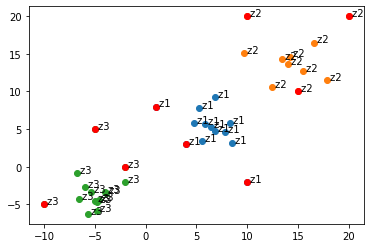

In [7]:
import matplotlib.pyplot as plt


image_clusters = [cluster.images for cluster in clusters]


x_es = [[image[0] for image in images] for images in image_clusters]
y_es = [[image[1] for image in images] for images in image_clusters]

names = [' z' + str(i + 1) for i in range(len(image_clusters))]

for i in range(len(x_es)):
    plt.scatter(x_es[i], y_es[i])

for i, txt in enumerate(names):
    for j in range(len(x_es[i])):
        plt.annotate(txt, (x_es[i][j], y_es[i][j]))

test_x = [image[0] for image in test_images]
test_y = [image[1] for image in test_images]

for i in range(len(test_x)):
    plt.scatter(test_x[i], test_y[i], c="r")

plt.show()
